In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [3]:
print('Importing librairies...')
import numpy as np
import pandas as pd
import talib
from zigzag import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
print('Librairies imported')

Importing librairies...
Librairies imported


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
start = '2017-02-16'
end = '2019-05-28'

In [6]:
vix = pd.read_csv('vix_5Y.csv')
index_pc = pd.read_csv('indexpc 2014_2019.csv',delimiter=';')
header = index_pc.iloc[1]
index_pc = index_pc.iloc[2:,:]
index_pc = index_pc.rename(columns = header)
index_pc.reset_index(inplace=True,drop=True)
vix = vix.iloc[:-1,1:-1]

In [7]:
index_pc.tail()

,DATE,CALL,PUT,TOTAL,P/C Ratio
1251,05/21/2019,793567,1156224,1949791,1.46
1252,05/22/2019,838707,862131,1700838,1.03
1253,05/23/2019,825548,1199985,2025533,1.45
1254,05/24/2019,809790,804403,1614193,0.99
1255,05/28/2019,661477,878284,1539761,1.33


In [8]:
df = pd.read_csv('spx_5Y.csv')
df = df.iloc[1:,1:-1]

In [9]:
vix.shape,df.shape,index_pc.shape

((1256, 5), (1256, 5), (1256, 5))

In [10]:
df.head()

,Date,Open,High,Low,Close
1,20140609,1948.97,1955.55,1947.16,1951.27
2,20140610,1950.34,1950.79,1944.64,1950.79
3,20140611,1949.37,1949.37,1940.08,1943.89
4,20140612,1943.35,1943.35,1925.78,1930.11
5,20140613,1930.80,1937.30,1927.69,1936.16


In [11]:
vix.head()

,Date,Open,High,Low,Close
0,20140602,11.69,12.17,11.29,11.58
1,20140603,12.03,12.13,11.72,11.87
2,20140604,12.15,12.33,11.91,12.08
3,20140605,12.09,12.34,11.44,11.68
4,20140606,11.32,11.39,10.73,10.73


for i in range(0,vix.shape[0]-1):
    if vix.iloc[i,0]!= df.iloc[i,0]:
        print('Vix :', vix.iloc[i,0],' spy : ', df.iloc[i,0])
        print('Index Vix:', vix.index[i],' index GBP/USD :',df.index[i])
        #df = df.drop([i],axis=0)
vix.reset_index(inplace=True,drop=True)
df.reset_index(inplace=True,drop=True)

In [12]:
vix.shape,df.shape

((1256, 5), (1256, 5))

In [13]:
vix.tail()

,Date,Open,High,Low,Close
1251,20190521,15.86,16.22,14.79,14.95
1252,20190522,15.06,15.44,14.42,14.75
1253,20190523,15.93,18.05,15.28,16.92
1254,20190524,16.34,16.52,15.52,15.85
1255,20190528,16.55,17.70,15.90,17.50


In [14]:
df.tail()

,Date,Open,High,Low,Close
1252,20190529,2790.25,2792.03,2766.06,2783.02
1253,20190530,2786.94,2799.00,2776.74,2788.86
1254,20190531,2766.15,2768.98,2750.52,2752.06
1255,20190603,2751.53,2763.07,2728.81,2744.45
1256,20190604,2762.64,2804.49,2762.63,2803.40


In [15]:
delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')

Période d'étude :  1256
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  1005  jours 
Bloc 2 : 251  jours


In [16]:
dataset_1D = df.copy()
dataset_1D['Vix'] = vix['Close']
dataset_1D['P/C Ratio'] = index_pc['P/C Ratio']
dataset_1D.head()

,Date,Open,High,Low,Close,Vix,P/C Ratio
1,20140609,1948.97,1955.55,1947.16,1951.27,11.87,1.38
2,20140610,1950.34,1950.79,1944.64,1950.79,12.08,0.74
3,20140611,1949.37,1949.37,1940.08,1943.89,11.68,0.73
4,20140612,1943.35,1943.35,1925.78,1930.11,10.73,1.04
5,20140613,1930.80,1937.30,1927.69,1936.16,11.15,0.97


In [17]:
dataset_1D.tail()

,Date,Open,High,Low,Close,Vix,P/C Ratio
1252,20190529,2790.25,2792.03,2766.06,2783.02,14.75,1.03
1253,20190530,2786.94,2799.00,2776.74,2788.86,16.92,1.45
1254,20190531,2766.15,2768.98,2750.52,2752.06,15.85,0.99
1255,20190603,2751.53,2763.07,2728.81,2744.45,17.50,1.33
1256,20190604,2762.64,2804.49,2762.63,2803.40,NaN,NaN


In [18]:
rsi = talib.RSI(dataset_1D['Close'],timeperiod=14)
upper, middle, lower =  talib.BBANDS(dataset_1D['Close'], timeperiod=9, nbdevup=2, nbdevdn=2,matype=0)
sma5 = talib.SMA(dataset_1D['Close'],timeperiod=5)
sma8 = talib.SMA(dataset_1D['Close'],timeperiod=8)
sma10 = talib.SMA(dataset_1D['Close'],timeperiod=10)
sma12 = talib.SMA(dataset_1D['Close'],timeperiod=12)
sma15 = talib.SMA(dataset_1D['Close'],timeperiod=15)
sma30 = talib.SMA(dataset_1D['Close'],timeperiod=30)
sma35 = talib.SMA(dataset_1D['Close'],timeperiod=35)
sma40 = talib.SMA(dataset_1D['Close'],timeperiod=40)
sma45 = talib.SMA(dataset_1D['Close'],timeperiod=45)
sma50 = talib.SMA(dataset_1D['Close'],timeperiod=50)

delta5_8 = sma5 - sma8
delta8_10 = sma8 - sma10
delta10_12 = sma10 - sma12
delta12_15 = sma12 - sma15
delta15_30 = sma15 - sma30
delta30_35 = sma30 - sma35
delta35_40 = sma35 - sma40
delta40_45 = sma40 - sma45
delta45_50 = sma45 - sma50

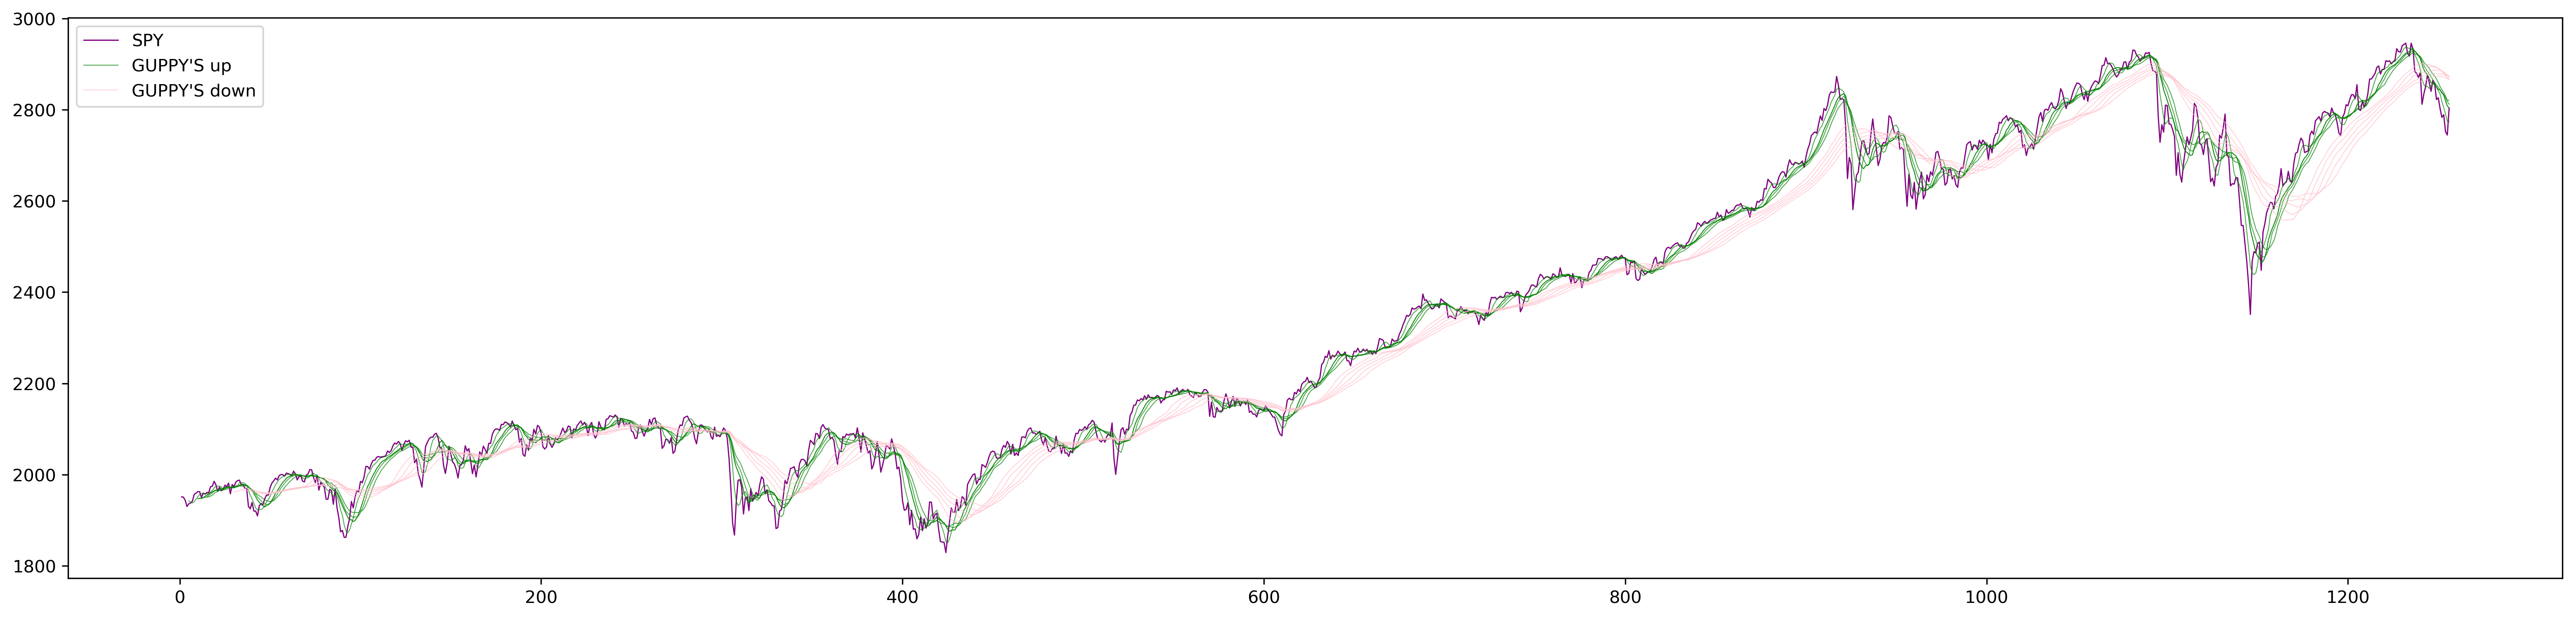

In [19]:
plt.figure(figsize=(26,6),dpi=300)
plt.plot(dataset_1D['Close'],label = 'SPY',color='purple',lw=0.7)
plt.plot(sma5,label = "GUPPY'S up", color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma12, color='g', alpha=0.7,lw=0.5)
plt.plot(sma15, color='g', alpha=0.7,lw=0.5)
plt.plot(sma30, label = "GUPPY'S down", color='pink', alpha=0.7,lw=0.5)
plt.plot(sma35, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma40, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma45, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma50, color='pink', alpha=0.7,lw=0.5)
plt.legend()
plt.show()

In [20]:
delta5_8.shape,delta8_10.shape, delta10_12.shape, delta12_15.shape, delta15_30 .shape,delta30_35.shape,delta35_40.shape,delta40_45.shape, delta45_50.shape

((1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,))

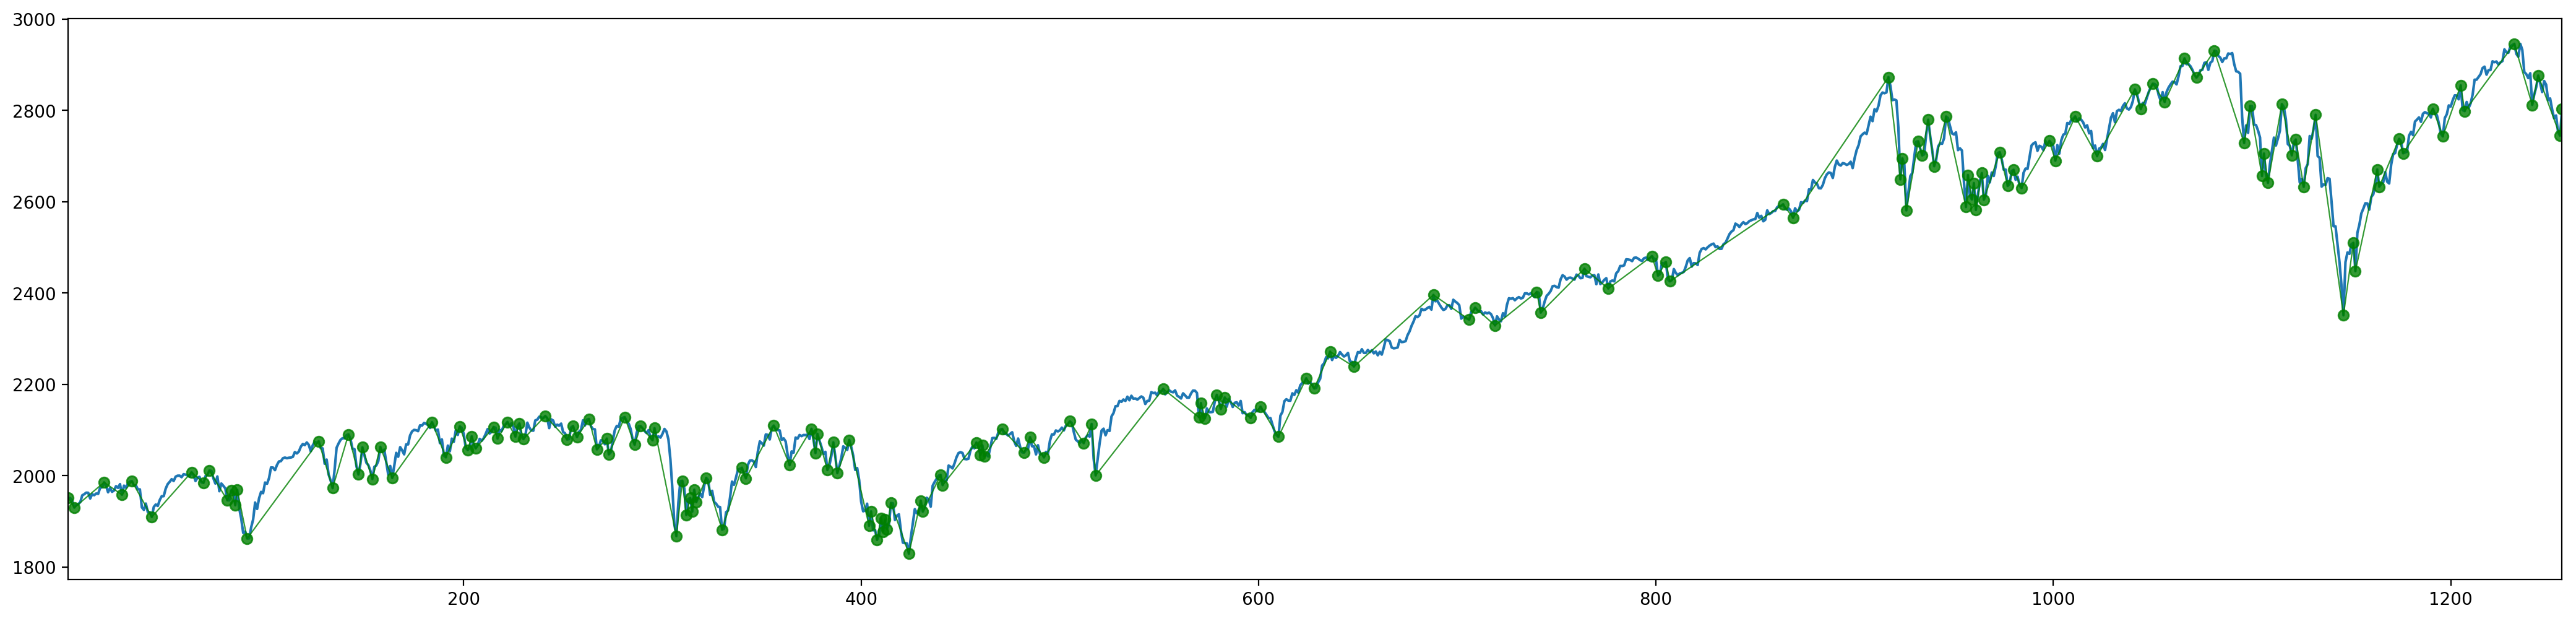

In [21]:
X = dataset_1D['Close']
pivots = peak_valley_pivots(X.values, 0.01, -0.01)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots = ts_pivots[pivots != 0]
plt.figure(figsize=(26,6),dpi=200)
X.plot()
ts_pivots.plot(style='g-o',lw=0.8,alpha=0.8);

peak = []
valley = []

for i in range(0,dataset_1D.shape[0]):
    if pivots[i] == 1:
        peak.append(pivots[i])
        valley.append(0)
    elif pivots[i] == -1:
        peak.append(0)
        valley.append(pivots[i])
    else:
        peak.append(0)
        valley.append(0)
        

In [22]:
len(pivots)

1256

In [23]:
bbdelta = upper - middle
price_bolup = dataset_1D['Close'] - lower
price_bolow = dataset_1D['Close'] - upper

In [24]:
ts_pivots.shape,bbdelta.shape,price_bolup.shape,price_bolow.shape

((177,), (1256,), (1256,), (1256,))

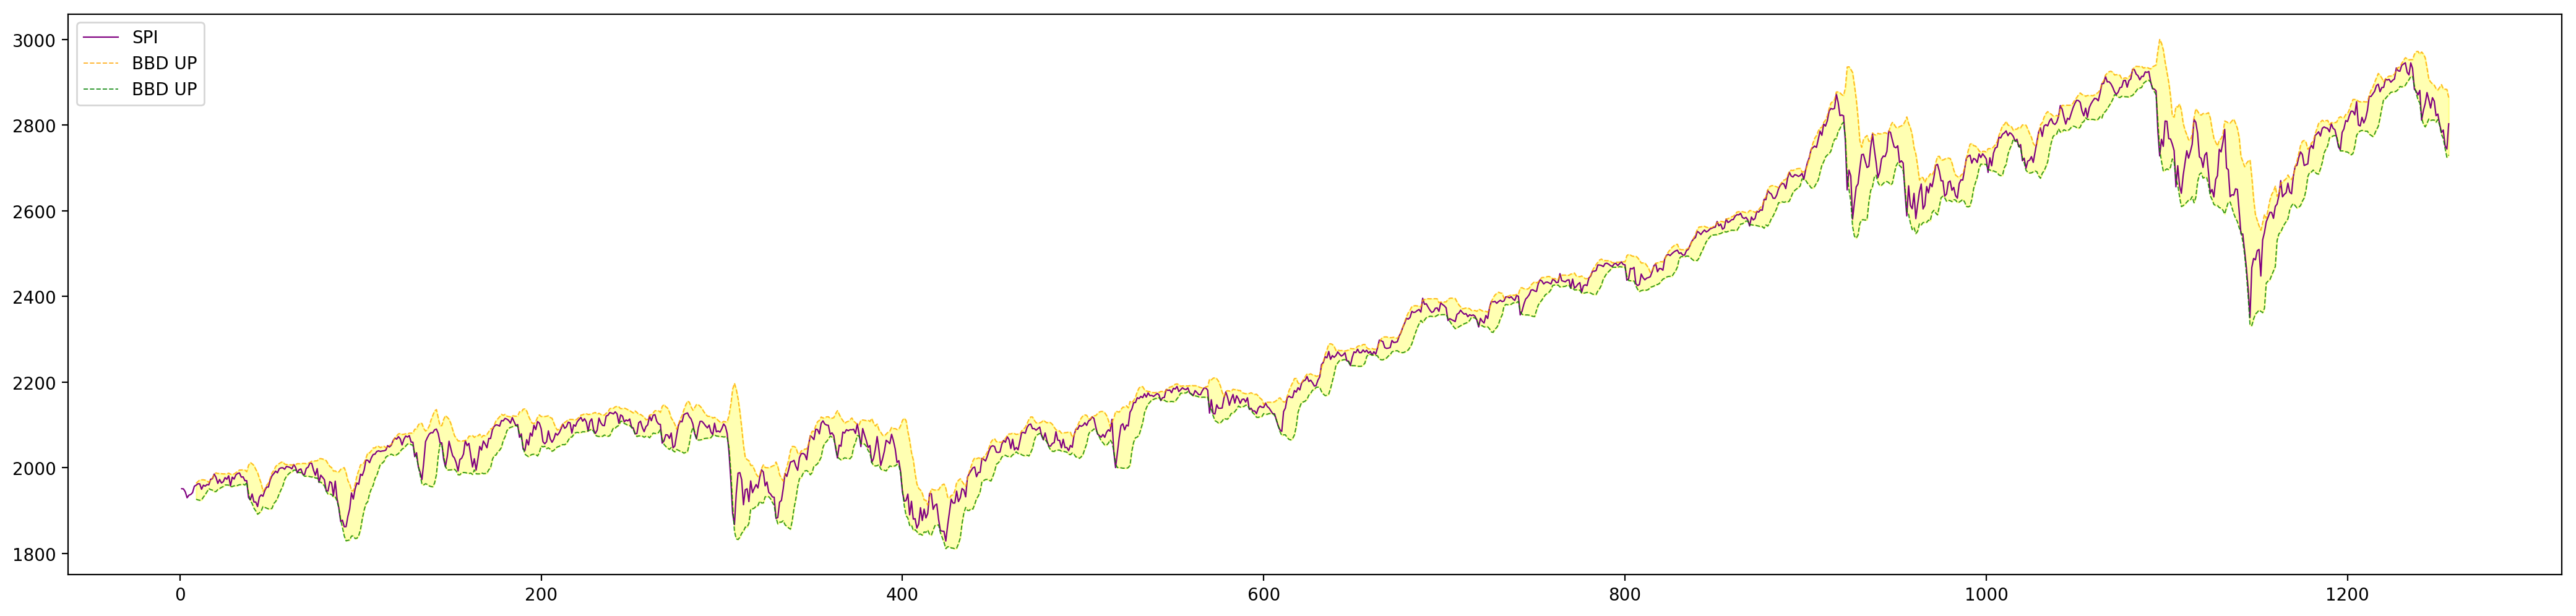

In [25]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Close'],label = 'SPI',color='purple',lw=0.8)
plt.plot(upper,label='BBD UP',color = 'orange',linestyle='--',lw=0.7,alpha=0.8)
plt.plot(lower,label='BBD UP',color = 'green',linestyle='--',lw=0.7,alpha=0.8)
plt.fill_between(x=dataset_1D.index,y1=upper,y2=lower,color='yellow',alpha=0.3)
plt.legend()
plt.show()

In [26]:
rsi25_list = []
rsi75_list = []
for i in range(0,dataset_1D.shape[0]):
    rsi75_list.append(75 - rsi[i])
    rsi25_list.append(rsi[i] - 25)

KeyError: 0

In [ ]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi,label = 'RSI',color='purple')
plt.axhline(y=75,color='c')
plt.axhline(y=25,color='c')

plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi75_list,label='rsi75',color='green',lw=0.7)
plt.plot(rsi25_list,label='rsi25',color='r',lw=0.7)

plt.legend()
plt.show()

In [ ]:
varop_spy = dataset_1D['Open'] - dataset_1D['Close']
varhl_spy = dataset_1D['High'] - dataset_1D['Low']
varop_vix = vix['Open'] - vix['Close']
varhl_vix = vix['High'] - vix['Low']

In [ ]:
varop_spy.shape,varhl_spy.shape,varop_vix.shape,varhl_vix.shape

In [ ]:
dataset_1D['Varop_Spy'] = varop_spy
dataset_1D['Varhl_spy'] = varhl_spy
dataset_1D['Varop_vix'] = varop_vix
dataset_1D['Varhl_vix'] = varhl_vix
dataset_1D['RSI'] = rsi
dataset_1D['75 - RSI'] = np.array(rsi75_list)
dataset_1D['RSI - 25'] = np.array(rsi25_list)

In [ ]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Varop_Spy'],label = 'Varop_Spy',lw=0.7)
plt.plot(dataset_1D['Varhl_spy'],label = 'Varhl_spy',lw=0.7)
plt.legend()


plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Varop_vix'],label = 'Varop_vix',lw=0.7)
plt.plot(dataset_1D['Varhl_vix'],label = 'Varhl_vix',lw=0.7)
plt.legend()
plt.show()

In [ ]:
dataset_1D.tail()

In [ ]:
dataset_1D['BBD_Delta_Up'] = bbdelta

dataset_1D.tail()

In [ ]:
dataset_1D['delta5_8'] = delta5_8
dataset_1D['delta8_10'] = delta8_10
dataset_1D['delta10_12'] = delta10_12
dataset_1D['delta12_15'] = delta12_15
dataset_1D['delta15_30'] = delta15_30
dataset_1D['delta30_35'] = delta30_35
dataset_1D['delta35_40'] = delta35_40
dataset_1D['delta40_45'] = delta40_45
dataset_1D['delta45_50'] = delta45_50

In [ ]:
dataset_1D.tail()

In [ ]:
spread = dataset_1D['Close'] - dataset_1D['Vix']
dataset_1D['Spread'] = spread
dataset_1D.tail()

In [ ]:
len(peak),len(valley),len(ts_pivots)

In [ ]:
modes = pivots_to_modes(pivots)
pd.Series(X).pct_change().groupby(modes).describe().unstack()

In [ ]:
compute_segment_returns(X, pivots).sum()

In [ ]:

max_drawdown(np.array(X))

In [ ]:
dataset_1D['Peaks'] = abs(np.array(peak))
dataset_1D['Valley'] = abs(np.array(valley))
dataset_1D.tail()

In [ ]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['delta5_8'],label = 'delta5_8',lw=0.7)
plt.plot(dataset_1D['delta8_10'],label = 'delta8_10',lw=0.7)
plt.plot(dataset_1D['delta10_12'],label = 'delta10_12',lw=0.7)
plt.plot(dataset_1D['delta12_15'],label = 'delta12_15',lw=0.7)
plt.plot(dataset_1D['delta15_30'],label = 'delta15_30',lw=0.7)
plt.plot(dataset_1D['delta30_35'],label = 'delta30_35',lw=0.7)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_1D['delta40_45'],label = 'delta40_45',lw=0.7)
plt.plot(dataset_1D['delta45_50'],label = 'delta45_50',lw=0.7)
plt.legend()

delta_1_2 = []
delta_1_3 =[]
delta_2_3 = []

delta_1_2.append(0)
delta_1_3.append(0)

delta_2_3.append(0)



for i in range(1,dataset_1D.shape[0]-1):
    delta_1_2.append(dataset_1D.iloc[-i,4] - dataset_1D.iloc[-i-1,4])
        
for i in range(1,dataset_1D.shape[0]-2):
     delta_1_3.append(dataset_1D.iloc[-i,4] - dataset_1D.iloc[-i-2,4])
    
for i in range(1,dataset_1D.shape[0]-2):
     delta_2_3.append(dataset_1D.iloc[-i-1,4] - dataset_1D.iloc[-i-2,4])

delta_1_2.append(0)
delta_1_3.append(0)
delta_2_3.append(0)
delta_1_3.append(0)
delta_2_3.append(0)


len(delta_1_2),len(delta_1_3),len(delta_2_3)

dataset_1D['delta_1_2'] = delta_1_2
dataset_1D['delta_2_3'] = delta_2_3
dataset_1D['delta_1_3'] = delta_1_3

In [ ]:
dataset_1D.tail()

In [ ]:
tsf = talib.TSF(dataset_1D['Close'],timeperiod=14)
type(tsf),len(tsf)

In [ ]:
delta_tsf = dataset_1D['Close'] - tsf
dataset_1D['delta_tsf'] = tsf
delta_tsf.shape

In [ ]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(tsf,label='TSF')
plt.legend()
plt.show()

In [ ]:
forosc = []
forosc.append(0)
for i in range(1,dataset_1D.shape[0]):
    forosc.append((dataset_1D.iloc[i,4] - tsf[i-1])*100/dataset_1D.iloc[i,4])
len(forosc),type(forosc)

In [ ]:
dataset_1D['Forcast Oscillator'] = (forosc)

In [ ]:
plt.figure(figsize=(26,6),dpi=200)
#plt.plot(dataset_1D['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(dataset_1D['Forcast Oscillator'],label='Forecast Oscilator',color='pink')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Forcast Oscillator'],label = 'Forcast Oscillator',lw=0.9,color='purple',alpha=0.9)
#plt.plot(dataset_1D['delta5_8'],label = 'delta5_8',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta8_10'],label = 'delta8_10',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta10_12'],label = 'delta10_12',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta12_15'],label = 'delta12_15',lw=0.6,color='r',alpha=0.6)
#plt.plot(dataset_1D['delta15_30'],label = 'delta15_30',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta30_35'],label = 'delta30_35',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta40_45'],label = 'delta40_45',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta45_50'],label = 'delta45_50',lw=0.6,color='g',alpha=0.6)
plt.legend()

In [ ]:
dataset_1D.info()

In [ ]:
df.head(0)

In [ ]:
target_up = []
target_down = []

for i in range(0,dataset_1D.shape[0]-1):
    
    if (dataset_1D.iloc[i+1,7] * dataset_1D.iloc[i,7]) < 0 :
        if (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4]) > 0 : #or (df.iloc[i+1,4] - df.iloc[i,3]) > 30:
            target_up.append(1)
            target_down.append(0)
        elif (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4]) < -0 : #or (df.iloc[i+1,4] - df.iloc[i,2]) < -30:
            target_up.append(0)
            target_down.append(1)
        else:
            target_up.append(0)
            target_down.append(0)
    else :
        target_up.append(0)
        target_down.append(0) 
        
target_up.append(0)
target_down.append(0)
#target_up.append(0)
#target_down.append(0)
#target_up.append(0)
#target_down.append(0)
#target_up.append(0)
#target_down.append(0)
#target_up.append(0)
#target_down.append(0)



target_up = []
target_down = []

for i in range(0,dataset_1D.shape[0]-5):
    
    if (dataset_1D.iloc[i+1,7]*dataset_1D.iloc[i,7]) < 0 :
    
        if (dataset_1D.iloc[i+5,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.02 or \
        (dataset_1D.iloc[i+4,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.03 or \
        (dataset_1D.iloc[i+3,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.04 or \
        (dataset_1D.iloc[i+2,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.05 or \
        (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.06 :
            target_up.append(1)
            target_down.append(0)
        elif (dataset_1D.iloc[i+5,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.02 or \
        (dataset_1D.iloc[i+4,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.03 or \
        (dataset_1D.iloc[i+3,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.04 or \
        (dataset_1D.iloc[i+2,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.05 or \
        (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.06 :
            target_up.append(0)
            target_down.append(1)
        else:
            target_up.append(0)
            target_down.append(0)
    else :
        target_up.append(0)
        target_down.append(0) 
        
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)



In [ ]:
len(target_up),len(target_down)

In [ ]:
dataset_1D['target_up'] = target_up
dataset_1D['target_down'] = target_down

dataset_1D['target_up'].sum(),dataset_1D['target_down'].sum()

In [ ]:
dataset_1D['target_value'] = dataset_1D['Close']
dataset_1D = dataset_1D.drop(['Open','High','Low','Close'],axis=1)

In [ ]:
dataset_1D.info()

In [ ]:
plt.figure(figsize=(26,20))
sns.heatmap(dataset_1D.iloc[:,:-1].corr(),annot=True)
plt.show()

In [ ]:
dataset_1D.tail()

In [ ]:
plt.figure(figsize=(26,8),dpi=300)
plt.plot(dataset_1D['target_value'],color='orange',lw=0.8)
for i in range(0,len(dataset_1D)):
    if dataset_1D.iloc[i,-3] == 1:
        plt.scatter(x=dataset_1D.index[i],y=dataset_1D.iloc[i,-1],c='g',marker='o')
    elif dataset_1D.iloc[i,-2] == 1:
        plt.scatter(x=dataset_1D.index[i],y=dataset_1D.iloc[i,-1],c='r',marker='o')
plt.legend()

In [ ]:
dataset_1D.to_csv('20190526 data prepared.csv')